In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
import pandas as pd
import tensorflow as tf
import numpy as np

# Import our input dataset
df = pd.read_csv('./resources/encoded_binned_df.csv')
df.head()

,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,Games Started,salBin_low,salBin_mid,salBin_high,salBin_top
0,4.51,246,106,105,16,10,14,635,925,0,200,75,33,1,0,0,0
1,5.97,37,23,25,0,0,5,104,162,0,185,75,7,1,0,0,0
2,3.77,13,6,7,0,1,2,43,63,0,195,76,3,1,0,0,0
3,4.53,214,95,82,20,7,18,566,797,0,178,71,31,1,0,0,0
4,2.76,179,57,127,13,12,8,557,784,1,180,74,24,1,0,0,0


In [2]:
### Drop unnecessary columns
df= df.filter(['Batters Faced by Pitcher','Outs Pitched','ERA','Strike Outs',"salBin_low","salBin_mid","salBin_high","salBin_top"])
df.head()

,Batters Faced by Pitcher,Outs Pitched,ERA,Strike Outs,salBin_low,salBin_mid,salBin_high,salBin_top
0,925,635,4.51,105,1,0,0,0
1,162,104,5.97,25,1,0,0,0
2,63,43,3.77,7,1,0,0,0
3,797,566,4.53,82,1,0,0,0
4,784,557,2.76,127,1,0,0,0


In [3]:
# Split our preprocessed data into our features and target arrays
y = df[["salBin_low","salBin_mid","salBin_high","salBin_top"]].values
X = df.drop(["salBin_low","salBin_mid","salBin_high","salBin_top"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 4


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=4, activation="softmax"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile the model
nn.compile(loss="kullback_leibler_divergence", optimizer="adam", metrics=["accuracy"])

In [7]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
116/116 [==============================] - 0s 652us/step - loss: 9.3597 - accuracy: 0.4130
Epoch 2/100
116/116 [==============================] - 0s 652us/step - loss: 2.9197 - accuracy: 0.4049
Epoch 3/100
116/116 [==============================] - 0s 704us/step - loss: 1.3590 - accuracy: 0.3833
Epoch 4/100
116/116 [==============================] - 0s 687us/step - loss: 1.2880 - accuracy: 0.3817
Epoch 5/100
116/116 [==============================] - 0s 704us/step - loss: 1.2532 - accuracy: 0.4049
Epoch 6/100
116/116 [==============================] - 0s 739us/step - loss: 1.2335 - accuracy: 0.4144
Epoch 7/100
116/116 [==============================] - 0s 678us/step - loss: 1.2216 - accuracy: 0.4368
Epoch 8/100
116/116 [==============================] - 0s 687us/step - loss: 1.2113 - accuracy: 0.4373
Epoch 9/100
116/116 [==============================] - 0s 696us/step - loss: 1.2024 - accuracy: 0.4425
Epoch 10/100
116/116 [==============================] - 0s 661us/step - l

In [8]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy*100:.2f}%")

39/39 - 0s - loss: 1.1743 - accuracy: 0.4211 - 105ms/epoch - 3ms/step
Loss: 1.1742912530899048, Accuracy: 42.11%


<AxesSubplot:>

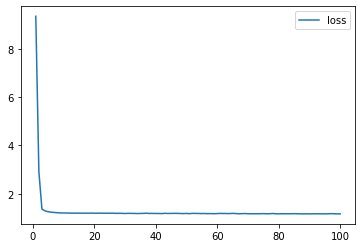

In [9]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

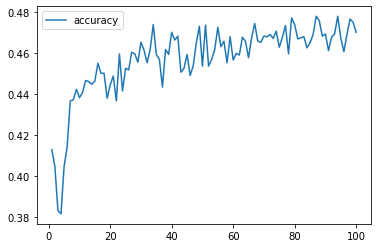

In [10]:
# Plot the accuracy
history_df.plot(y="accuracy")